In [1]:
from IPython.display import Markdown as md
import datetime
import pandas as pd
from dotenv import load_dotenv
import os
import sys
sys.path.append("../")
from src.upload_download_bitdotio import download_dataset
from src.bls_query import get_recessions_fred, monthly_national_sub
from src.plots import labor_turnover_rates

load_dotenv()
PG_STRING = os.getenv("BITIO_PG_STRING")
FRED_KEY = os.getenv("FRED_API_KEY")
BITIO_REPO = f'{os.environ.get("BITIO_REPO")}'

In [2]:
md("Last Updated: {}".format(datetime.datetime.now().strftime("%Y-%m-%d")))

Last Updated: 2022-06-04

# Bureau of Labor Statistics (BLS) Quit Rate Data

This notebook includes some exploratory figures about the Bureau of Labor Statistics (BLS) quit rate data from the [Job Openings and Labor Turnover Survey](https://www.bls.gov/jlt/#data). The notebook is automatically updated weekly, though manual updates can be executed as needed.

In [3]:
# get data
recessions = get_recessions_fred(FRED_KEY, end_date=pd.to_datetime("today").strftime("%Y-%m-%d"))
quits = monthly_national_sub(download_dataset(f'"{BITIO_REPO}"."quit_rate"', PG_STRING))
layoffs = monthly_national_sub(download_dataset(f'"{BITIO_REPO}"."layoffs_discharges_rate"', PG_STRING))
openings = monthly_national_sub(download_dataset(f'"{BITIO_REPO}"."job_openings_rate"', PG_STRING))

findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Inter'] not found. Falling back to DejaVu Sans.


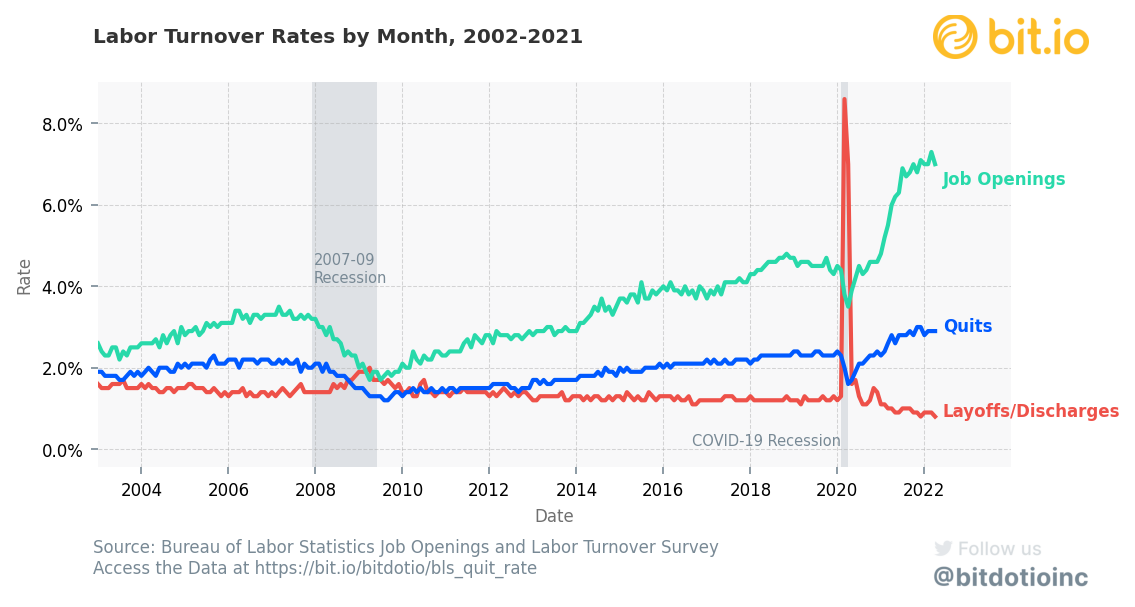

In [4]:
# plot
labor_turnover_rates(layoffs, quits, openings, recessions)